D:\Users\ouyangqq\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Consuming time of 4000 saved_figs SA1 units :1.333437204360962
Consuming time of 4000 saved_figs RA1 units :1.2437114715576172
Consuming time of 4000 saved_figs PC units :1.6126506328582764


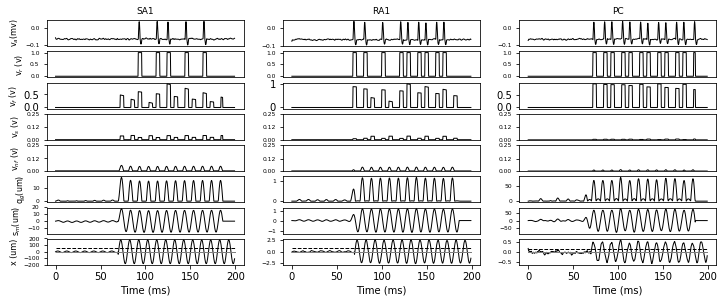

In [2]:
#action potential response to stimulus
from sys import path
import Receptors as receptorlib
import ultils as alt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,4.5)) 

def wave_set(tsensor,x1,x2):
    global rate
    global rate1
    global Tstart
    global Tend
    rate=30  #mm/s
    rate1=-10 
    intentation=x1*1e-6 #um
    Tstart=0.000
    Tend=0.3*tsensor.T
    w=(tsensor.wbl+tsensor.wbh)/2
    w=2*np.pi*100
    tsensor.stimulus[tsensor.stp,int(Tstart/tsensor.dt):]=receptorlib.sin_wave(tsensor.t,w,intentation)[int(Tstart/tsensor.dt):]
    intentation=x2*1e-6 #um
    Tstart=0.35*tsensor.T
    Tend=0.9*tsensor.T
    tsensor.stimulus[tsensor.stp,int(Tstart/tsensor.dt):]=receptorlib.sin_wave(tsensor.t,w,intentation)[int(Tstart/tsensor.dt):]
    
p_s=[[50,600],[5,24],[3,12]]
Th_100=0
def Print_fig2(rownum,tactile_type,col,colour):
    global intentation
    global rate
    global rate1
    global Tstart
    global Tend
    global Th_100 
    #global Th
    #global stimulus
    sim_num=4000
    tsensor=receptorlib.tactile_receptors(Ttype=tactile_type,simTime=0.2,sample_rate=3000,sample_num=sim_num)
    tr=int(tsensor.T/tsensor.dt)-2
    start=int(0/tsensor.dt) 
    # calulate the neural threshold at frequency of 100Hz for each afferent type
    Th_100=1e6* tsensor.VL/np.abs(receptorlib.transfer_func(1j*2*np.pi*100,[tsensor.Kb1,tsensor.Kb2,tsensor.Kb3],tsensor.Ku,tsensor.wbl,tsensor.wbh,tsensor.wl,tsensor.N))/tsensor.As 
    wave_set(tsensor,0.2*Th_100,Th_100*3)
    
    # the reture value of tactile_units_simulating() is consuming time
    A=tsensor.tactile_units_simulating(tsensor.stimulus)
    print('Consuming time of '+str(sim_num)+" saved_figs "+tactile_type+' units :'+str(A))
    row_count=1
    plt.subplot(rownum,3,row_count+(col-1))
    plt.title(tactile_type,fontsize=9)
    plt.plot(1000*tsensor.t[start:start+tr],tsensor.Va[tsensor.stp,start:start+tr],colour,linewidth=1)
    plt.xticks([],fontsize=11,color='none')
    plt.yticks(fontsize=6)
    if(col==1): 
        plt.ylabel('$\mathrm{v}_{a}$(mv)',fontsize=8) 

    row_count=row_count+3
    plt.subplot(rownum,3,row_count+(col-1))
    plt.plot(1000*tsensor.t[start:start+tr],tsensor.Vr[tsensor.stp,start:start+tr],colour,linewidth=1)
    plt.xticks([],fontsize=11,color='none')
    plt.yticks([0,round(tsensor.VH/2,2),round(tsensor.VH/1,2)],fontsize=6)
    if(col==1): 
        plt.ylabel('$\mathrm{v}_{r}$ (v)',fontsize=8)

    row_count=row_count+3
    plt.subplot(rownum,3,row_count+(col-1))
    plt.plot(1000*tsensor.t[start:start+tr],tsensor.Vf[tsensor.stp,start:start+tr],colour,linewidth=1)
    plt.xticks([],fontsize=11,color='none')
    #plt.yticks([0,round(tsensor.VH/2,2),round(tsensor.VH/1,2)],fontsize=6)
    if(col==1): 
        plt.ylabel('$\mathrm{v}_{f}$ (v)',fontsize=8)

    row_count=row_count+3        
    plt.subplot(rownum,3,row_count+(col-1))
    plt.plot(1000*tsensor.t[start:start+tr],tsensor.Vs[tsensor.stp,start:start+tr],colour,linewidth=1)
    plt.xticks([],fontsize=11,color='none')
    plt.yticks([0,round(tsensor.VH/8,2),round(tsensor.VH/4,2)],fontsize=6)
    if(col==1): 
        plt.ylabel('$\mathrm{v}_{s}$ (v)',fontsize=8)

    row_count=row_count+3
    plt.subplot(rownum,3,row_count+(col-1))
    plt.plot(1000*tsensor.t[start:start+tr],tsensor.Vnf[tsensor.stp,start:start+tr],colour,linewidth=1)
    plt.xticks([],fontsize=11,color='none')
    plt.yticks([0,round(tsensor.VH/8,2),round(tsensor.VH/4,2)],fontsize=6)
    if(col==1): 
        plt.ylabel('$\mathrm{v}_{nf}$ (v)',fontsize=8)

    row_count=row_count+3
    plt.subplot(rownum,3,row_count+(col-1))
    plt.plot(1000*tsensor.t[start:start+tr],1e6*tsensor.Qg[tsensor.stp,start:start+tr],colour,linewidth=1)
    plt.xticks([],fontsize=11,color='none')
    plt.yticks(fontsize=6)
    if(col==1): 
        plt.ylabel('$\mathrm{q}_{g}$(um)',fontsize=8)
 
    row_count=row_count+3
    plt.subplot(rownum,3,row_count+(col-1))
    plt.plot(1000*tsensor.t[start:start+tr],1e6*tsensor.Sm[tsensor.stp,start:start+tr],colour,linewidth=1)
    plt.xticks([],fontsize=11,color='none')
    plt.yticks(fontsize=6)
    if(col==1): 
        plt.ylabel('$\mathrm{s}_{m}$(um)',fontsize=8)
       
    row_count=row_count+3        
    plt.subplot(rownum,3,row_count+(col-1))
    plt.plot(1000*tsensor.t[start:start+tr],1e6*tsensor.X0[tsensor.stp,start:start+tr],colour,linewidth=1)
    plt.plot(1000*tsensor.t[start:start+tr],Th_100*np.ones(tsensor.t.size)[start:start+tr],'k--',linewidth=1)
    plt.plot(1000*tsensor.t[start:start+tr],np.zeros(tsensor.t.size)[start:start+tr],'gray',linewidth=1)
    plt.xlabel('Time (ms)')
    plt.yticks(fontsize=6)
    if(col==1): 
        plt.ylabel('x (um)',fontsize=8)
    return tsensor

tsa1=Print_fig2(8,"SA1",1,'k')
tra1=Print_fig2(8,"RA1",2,'k')
tpc=Print_fig2(8,"PC",3,'k')

filepath='saved_figs/'
plt.savefig(filepath+'Intermediate_signals.png',bbox_inches='tight', dpi=300)
